#### Customer churn prediction is to measure why customers are leaving a business. Here we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')


## Loading data

In [7]:
df = pd.read_csv("C:/Users/Amar Shilvanth/Downloads/churn (1).csv")

pd.set_option('display.max_columns', None)
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,OnlineBackup,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
0,2907-ILJBN,Female,0.0,Yes,Yes,11.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,No
1,3896-RCYYE,Female,0.0,No,No,67.0,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),53.40,3579.15,No
2,9764-REAFF,Female,0.0,Yes,No,59.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No
3,6651-RLGGM,Male,0.0,Yes,Yes,67.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.30,1688.90,No
4,5879-SESNB,Female,0.0,No,No,11.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,75.25,888.65,No
5,8670-MEFCP,Female,0.0,Yes,Yes,36.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),92.90,3379.25,No
6,9782-LGXMC,Female,0.0,Yes,Yes,49.0,Yes,No,DSL,Yes,No,Yes,Yes,No,No,Month-to-month,No,Bank transfer (automatic),61.75,3024.15,No
7,0931-MHTEM,Female,0.0,No,No,54.0,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),100.05,5299.65,No
8,4993-JCRGJ,Male,0.0,No,No,26.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,84.30,2281.60,No
9,7369-TRPFD,Male,0.0,No,No,19.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,279.20,No


In [8]:
df.Churn.value_counts()

No     6728
Yes    5607
Name: Churn, dtype: int64

In [9]:
517400/df.shape[0]

41.945683015808676

In [10]:
df.drop('customerID',axis = 1,inplace = True)

In [11]:
df.dtypes

gender                      object
SeniorCitizen              float64
Partner                     object
Dependents                  object
tenure                     float64
CallService                 object
MultipleConnections         object
InternetConnection          object
OnlineSecurity              object
OnlineBackup                object
DeviceProtectionService     object
TechnicalHelp               object
OnlineTV                    object
OnlineMovies                object
Agreement                   object
BillingMethod               object
PaymentMethod               object
MonthlyServiceCharges      float64
TotalAmount                float64
Churn                       object
dtype: object

In [13]:
df.TotalAmount.values

array([ 233.9      , 3579.15     , 1057.85     , ..., 4091.168541 ,
        560.1536433,  263.0068751])

In [15]:
pd.to_numeric(df.TotalAmount,errors='coerce').isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
12330    False
12331    False
12332    False
12333    False
12334    False
Name: TotalAmount, Length: 12335, dtype: bool

In [16]:
df[pd.to_numeric(df.TotalAmount,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,OnlineBackup,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn


In [17]:
pd.to_numeric(df.TotalAmount,errors='coerce').dtype

dtype('float64')

In [18]:
df.shape

(12335, 20)

In [20]:
df.iloc[488].TotalAmount

4719.75

In [21]:
df[df.TotalAmount != ' '].shape

(12335, 20)

#### Total number of rows with values as '  ' are 
7043-7032 = 11

In [23]:
df1 = df[df.TotalAmount !=' ']
df1.shape

(12335, 20)

In [24]:
df1.dtypes

gender                      object
SeniorCitizen              float64
Partner                     object
Dependents                  object
tenure                     float64
CallService                 object
MultipleConnections         object
InternetConnection          object
OnlineSecurity              object
OnlineBackup                object
DeviceProtectionService     object
TechnicalHelp               object
OnlineTV                    object
OnlineMovies                object
Agreement                   object
BillingMethod               object
PaymentMethod               object
MonthlyServiceCharges      float64
TotalAmount                float64
Churn                       object
dtype: object

In [25]:
df1.TotalAmount = pd.to_numeric(df1.TotalAmount)

In [26]:
df1.dtypes

gender                      object
SeniorCitizen              float64
Partner                     object
Dependents                  object
tenure                     float64
CallService                 object
MultipleConnections         object
InternetConnection          object
OnlineSecurity              object
OnlineBackup                object
DeviceProtectionService     object
TechnicalHelp               object
OnlineTV                    object
OnlineMovies                object
Agreement                   object
BillingMethod               object
PaymentMethod               object
MonthlyServiceCharges      float64
TotalAmount                float64
Churn                       object
dtype: object

In [27]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,OnlineBackup,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
0,Female,0.0,Yes,Yes,11.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,No
1,Female,0.0,No,No,67.0,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),53.40,3579.15,No
2,Female,0.0,Yes,No,59.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No
3,Male,0.0,Yes,Yes,67.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.30,1688.90,No
4,Female,0.0,No,No,11.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,75.25,888.65,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6723,Male,0.0,No,No,31.0,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,50.05,1523.40,No
6724,Male,0.0,Yes,No,22.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.45,471.55,No
6725,Female,0.0,No,No,55.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,73.10,4144.90,No
6726,Male,0.0,No,No,5.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.25,86.05,No


## Data Visualizations

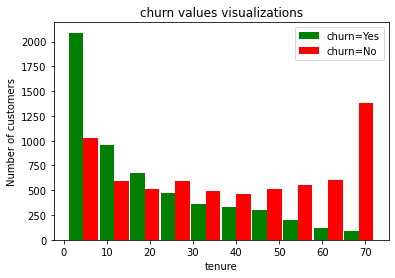

In [28]:
tenure_churn_no = df1[df1.Churn=="No"].tenure
tenure_churn_yes = df1[df1.Churn=="Yes"].tenure
plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.title("churn values visualizations")
plt.hist([tenure_churn_yes,tenure_churn_no], rwidth = 0.95, color = ['green','red'], label=['churn=Yes','churn=No'])
plt.legend()

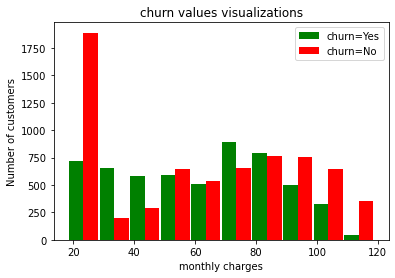

In [30]:
mc_churn_no = df1[df1.Churn=="No"].MonthlyServiceCharges
mc_churn_yes = df1[df1.Churn=="Yes"].MonthlyServiceCharges
plt.xlabel("monthly charges")
plt.ylabel("Number of customers")
plt.title("churn values visualizations")
plt.hist([mc_churn_yes,mc_churn_no], rwidth = 0.95, color = ['green','red'], label=['churn=Yes','churn=No'])
plt.legend()

In [31]:
def unique_column_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [32]:
unique_column_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
CallService: ['Yes' 'No']
MultipleConnections: ['No' 'No phone service' 'Yes']
InternetConnection: ['No' 'DSL' 'Fiber optic']
OnlineSecurity: ['No internet service' 'No' 'Yes']
OnlineBackup: ['No internet service' 'No' 'Yes']
DeviceProtectionService: ['No internet service' 'Yes' 'No']
TechnicalHelp: ['No internet service' 'Yes' 'No']
OnlineTV: ['No internet service' 'Yes' 'No']
OnlineMovies: ['No internet service' 'Yes' 'No']
Agreement: ['One year' 'Month-to-month' 'Two year']
BillingMethod: ['No' 'Yes']
PaymentMethod: ['Mailed check' 'Credit card (automatic)' 'Bank transfer (automatic)'
 'Electronic check']
Churn: ['No' 'Yes']


### Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [33]:
df1.replace('No internet service','No',inplace = True)
df1.replace('No phone service','No',inplace = True)

In [34]:
unique_column_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
CallService: ['Yes' 'No']
MultipleConnections: ['No' 'Yes']
InternetConnection: ['No' 'DSL' 'Fiber optic']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['No' 'Yes']
DeviceProtectionService: ['No' 'Yes']
TechnicalHelp: ['No' 'Yes']
OnlineTV: ['No' 'Yes']
OnlineMovies: ['No' 'Yes']
Agreement: ['One year' 'Month-to-month' 'Two year']
BillingMethod: ['No' 'Yes']
PaymentMethod: ['Mailed check' 'Credit card (automatic)' 'Bank transfer (automatic)'
 'Electronic check']
Churn: ['No' 'Yes']


### Convert Yes and No to 1 or 0

In [35]:
yes_no_columns = ['Partner','Dependents','CallService','MultipleConnections','OnlineSecurity','OnlineBackup',
                  'DeviceProtectionService','TechnicalHelp','OnlineTV','OnlineMovies','BillingMethod','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [36]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0.         1.         0.5632268  0.42858883 0.52834878 0.59327852
 0.79696507 0.93627326 0.1344534  0.20990739 0.90949486 0.96391889
 0.49539016 0.27809836 0.23650948 0.47279928 0.87639983 0.14882965
 0.70034205 0.38426984 0.65266454 0.72238255 0.76772846 0.36486108
 0.08234054 0.45099365 0.90450648 0.21170374 0.48336045 0.81159254
 0.1415199  0.62703472 0.9755839  0.78130564 0.07205834 0.05657654
 0.11700096 0.8914037  0.27076239 0.57548262 0.29460722 0.95226879
 0.05671457 0.04272096 0.2443125  0.22477562 0.11308228 0.1913087
 0.57940295 0.21299665 0.97984444 0.50124795 0.93933844 0.18008267
 0.20028951 0.56212957 0.34546586 0.23392375 0.20997815 0.29267974
 0.6041458  0.97539268 0.51916053 0.31928784 0.06405092 0.07618527
 0.51983924 0.79198767 0.40566464 0.93497301 0.24843664 0.47628566
 0.88404527 0.9986877  0.51448203 0.71561034 0.94044364 0.70280565
 0.20799511 0.72729858 0.75200767 0.63840712 0.03151417 0.58729605
 0.71725088 0.87389256 0

In [37]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace =True)

In [38]:
df1.gender.unique()

array([1, 0], dtype=int64)

#### one hot encoding for categorical values

In [40]:
df2 = pd.get_dummies(data = df1, columns = ['InternetConnection','Agreement','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'CallService', 'MultipleConnections', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtectionService', 'TechnicalHelp', 'OnlineTV', 'OnlineMovies',
       'BillingMethod', 'MonthlyServiceCharges', 'TotalAmount', 'Churn',
       'InternetConnection_DSL', 'InternetConnection_Fiber optic',
       'InternetConnection_No', 'Agreement_Month-to-month',
       'Agreement_One year', 'Agreement_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [41]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,OnlineSecurity,OnlineBackup,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,BillingMethod,MonthlyServiceCharges,TotalAmount,Churn,InternetConnection_DSL,InternetConnection_Fiber optic,InternetConnection_No,Agreement_Month-to-month,Agreement_One year,Agreement_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6619,0,0.0,0,0,59.000000,0,0,0,0,0,1,1,1,1,51.700000,3005.800000,0,1,0,0,1,0,0,0,0,1,0
1203,1,0.0,0,0,41.000000,1,0,0,0,0,0,0,0,1,19.750000,806.950000,0,0,0,1,0,1,0,0,0,0,1
9740,1,0.0,0,1,12.981268,1,1,0,0,1,0,0,0,0,37.951231,343.148855,1,0,1,0,1,0,0,0,0,0,1
1081,0,0.0,0,1,66.000000,1,0,0,0,0,0,0,0,0,19.950000,1269.100000,0,0,0,1,0,0,1,0,1,0,0
8421,0,0.0,0,0,69.000000,1,1,0,0,1,1,1,1,1,106.500000,7348.800000,1,0,1,0,0,0,1,1,0,0,0


In [42]:
df2.dtypes

gender                                       int64
SeniorCitizen                              float64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
CallService                                  int64
MultipleConnections                          int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtectionService                      int64
TechnicalHelp                                int64
OnlineTV                                     int64
OnlineMovies                                 int64
BillingMethod                                int64
MonthlyServiceCharges                      float64
TotalAmount                                float64
Churn                                        int64
InternetConnection_DSL                       uint8
InternetConnection_Fiber optic               uint8
InternetConnection_No          

In [43]:
cols_to_scale = ['tenure','MonthlyServiceCharges','TotalAmount']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [44]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0.         1.         0.5632268  0.42858883 0.52834878 0.59327852
 0.79696507 0.93627326 0.1344534  0.20990739 0.90949486 0.96391889
 0.49539016 0.27809836 0.23650948 0.47279928 0.87639983 0.14882965
 0.70034205 0.38426984 0.65266454 0.72238255 0.76772846 0.36486108
 0.08234054 0.45099365 0.90450648 0.21170374 0.48336045 0.81159254
 0.1415199  0.62703472 0.9755839  0.78130564 0.07205834 0.05657654
 0.11700096 0.8914037  0.27076239 0.57548262 0.29460722 0.95226879
 0.05671457 0.04272096 0.2443125  0.22477562 0.11308228 0.1913087
 0.57940295 0.21299665 0.97984444 0.50124795 0.93933844 0.18008267
 0.20028951 0.56212957 0.34546586 0.23392375 0.20997815 0.29267974
 0.6041458  0.97539268 0.51916053 0.31928784 0.06405092 0.07618527
 0.51983924 0.79198767 0.40566464 0.93497301 0.24843664 0.47628566
 0.88404527 0.9986877  0.51448203 0.71561034 0.94044364 0.70280565
 0.20799511 0.72729858 0.75200767 0.63840712 0.03151417 0.58729605
 0.71725088 0.87389256 0.29173319 0.

## Train Test Split

In [45]:
x = df2.drop('Churn', axis = 'columns')
y = test_labels = df2.Churn.astype(np.float)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 20, stratify = y)

In [46]:
y_train.value_counts()

0.0    5382
1.0    4486
Name: Churn, dtype: int64

## Build a model(ANN) in tensorflow/keras

In [47]:
from tensorflow_addons import losses

In [48]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim = 26, activation = 'relu'),
        keras.layers.Dense(15, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
    ])
    model.compile(optimizer = 'adam', loss = loss, metrics = ['accuracy'])
    if weights == -1:
        model.fit(X_train, y_train, epochs = 100)
    else:
        model.fit(X_train, y_train, epochs = 100, class_weight = weights)
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    print("classification report: \n", classification_report(y_test, y_preds))
    return y_preds

In [50]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
309/309 [==============================] - 0s 1ms/step - loss: 0.5922 - accuracy: 0.6649
Epoch 2/100
309/309 [==============================] - 0s 1ms/step - loss: 0.5269 - accuracy: 0.7228
Epoch 3/100
309/309 [==============================] - 0s 1ms/step - loss: 0.4900 - accuracy: 0.7507
Epoch 4/100
309/309 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.7663
Epoch 5/100
309/309 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.7707
Epoch 6/100
309/309 [==============================] - 0s 1ms/step - loss: 0.4376 - accuracy: 0.7827
Epoch 7/100
309/309 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.7893
Epoch 8/100
309/309 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.7916
Epoch 9/100
309/309 [==============================] - 0s 1ms/step - loss: 0.4086 - accuracy: 0.7972
Epoch 10/100
309/309 [==============================] - 0s 1ms/step - loss: 0.4004 - accura

309/309 [==============================] - 0s 1ms/step - loss: 0.2737 - accuracy: 0.8772
Epoch 82/100
309/309 [==============================] - 0s 1ms/step - loss: 0.2746 - accuracy: 0.8723
Epoch 83/100
309/309 [==============================] - 0s 1ms/step - loss: 0.2753 - accuracy: 0.8728
Epoch 84/100
309/309 [==============================] - 0s 1ms/step - loss: 0.2749 - accuracy: 0.8763
Epoch 85/100
309/309 [==============================] - 0s 1ms/step - loss: 0.2718 - accuracy: 0.8754
Epoch 86/100
309/309 [==============================] - 0s 1ms/step - loss: 0.2733 - accuracy: 0.8772
Epoch 87/100
309/309 [==============================] - 0s 1ms/step - loss: 0.2713 - accuracy: 0.8757
Epoch 88/100
309/309 [==============================] - 0s 1ms/step - loss: 0.2712 - accuracy: 0.8789
Epoch 89/100
309/309 [==============================] - 0s 1ms/step - loss: 0.2732 - accuracy: 0.8744
Epoch 90/100
309/309 [==============================] - 0s 1ms/step - loss: 0.2692 - accuracy: 

In [51]:
y_test.value_counts()

0.0    1346
1.0    1121
Name: Churn, dtype: int64